# Imports

In [7]:
import re

import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import plotly.express as px
from git_root import git_root

import nltk

In [2]:
my_git_root = git_root()

In [4]:
df_extracted_path = f'{my_git_root}/data/output/documents.csv'
df_extracted = pd.read_csv(df_extracted_path)

In [5]:
df_extracted

,name,text
0,aalto-university.md,# Aalto University \n\n## Aalto University Re...
1,aberystwyth-university.md,# Research Data Management Policy \n\nVersion...
2,aston-university.md,# Research Data Management Policy \n\nJuly 20...
3,bangor-university.md,# Data Protection Policy \n\n<html><body><tab...
4,brunel-university-london.md,# Brunel University Research Data Management P...
...,...,...
137,universität-rostock.md,# Research Data Policy of the University of Ro...
138,universität-siegen.md,# Research-Data-Policy of the University of Si...
139,universität-stuttgart.md,# Research data management policy of the Unive...
140,utrecht-university.md,# University policy framework for research dat...


In [9]:
documents = df_extracted['text']
documents_words = [nltk.word_tokenize(document) for document in documents]
num_documents_words = [len(document) for document in documents_words]

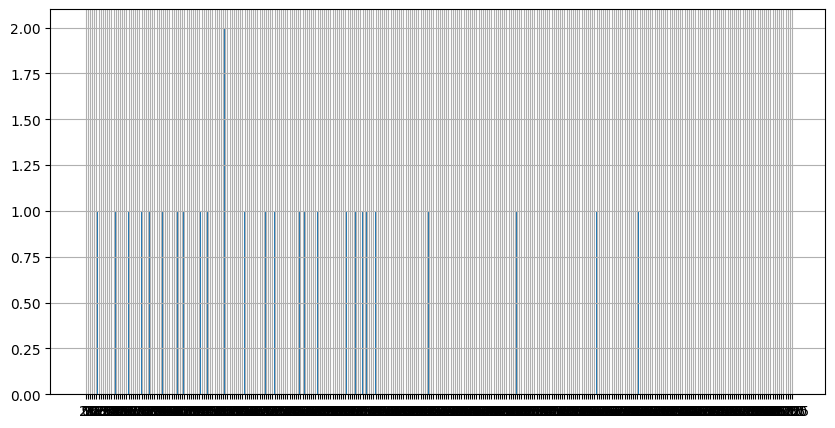

In [13]:
fig, ax = plt.subplots(figsize = (10,5))
plt.hist(num_documents_words, bins=np.arange(0, np.max(num_documents_words) + 5, 5))
ax.set_xticks(np.arange(0, np.max(num_documents_words) + 25, 25))
ax.grid()
plt.savefig(f'{my_git_root}/notebooks/images/document_statistics/num_words.svg')
plt.show()

In [17]:
df_extracted['text'].value_counts()

text
# Aalto University  \n\n## Aalto University Research Data Management Policy  \n\nThe research data management policy aims to make data management easier for the individual researcher. Managing and curating data creates competitive edge, and allocating resources for that is a strategic choice of the university. The purposes of this policy are to (1) encourage to informed decision making in research data management and (2) define the principles used in the opening of publicly funded scientific research data to achieve wide societal impact and the strategic goals of Aalto University.  \n\nThe data management policy shall be implemented through conscious and strategic decisions. Open access publishing of research data aims to make research data easily discoverable, assessable, intelligible, usable and interoperable. Where applicable, these requirements can also be applied to data other than open access published research data, and to the software needed to handle the open data. The de

In [18]:
texts = df_extracted['text'].to_list()

In [35]:
names = []
paragraphs = []

for i, row in df_extracted.iterrows():
    text = row['text']
    my_paragraphs = re.split(r'\s*\n+\s*', text)
    paragraphs.append(my_paragraphs)
    names.append([row['name']] * len(my_paragraphs))

In [36]:
names = flatten(names)
paragraphs = flatten(paragraphs)

In [37]:
len(names)

10408

In [38]:
df_paragraphs = pd.DataFrame({'name': names, 'text': paragraphs})

In [39]:
df_paragraphs.to_csv(f'{my_git_root}/data/documents_paragraphs.csv', index=False)

In [19]:
my_text = texts[0]
len(my_text)

8234

In [20]:
doc_len = [len(text) for text in texts]

words = []
for text in texts:
    words.append(len(text.split()))

num_sents = []
for text in texts:
    sents = nltk.sent_tokenize(text)
    num_sents.append(len(sents))

df_extracted['text_len'] = doc_len
df_extracted['words'] = words
df_extracted['num_sents'] = num_sents

In [21]:
df_extracted

,name,text,text_len,words,num_sents
0,aalto-university.md,# Aalto University \n\n## Aalto University Re...,8234,1190,51
1,aberystwyth-university.md,# Research Data Management Policy \n\nVersion...,4664,616,36
2,aston-university.md,# Research Data Management Policy \n\nJuly 20...,15528,2110,88
3,bangor-university.md,# Data Protection Policy \n\n<html><body><tab...,33111,4970,175
4,brunel-university-london.md,# Brunel University Research Data Management P...,12631,1835,98
...,...,...,...,...,...
137,universität-rostock.md,# Research Data Policy of the University of Ro...,7372,1102,48
138,universität-siegen.md,# Research-Data-Policy of the University of Si...,2014,279,3
139,universität-stuttgart.md,# Research data management policy of the Unive...,3144,443,22
140,utrecht-university.md,# University policy framework for research dat...,12625,1872,77


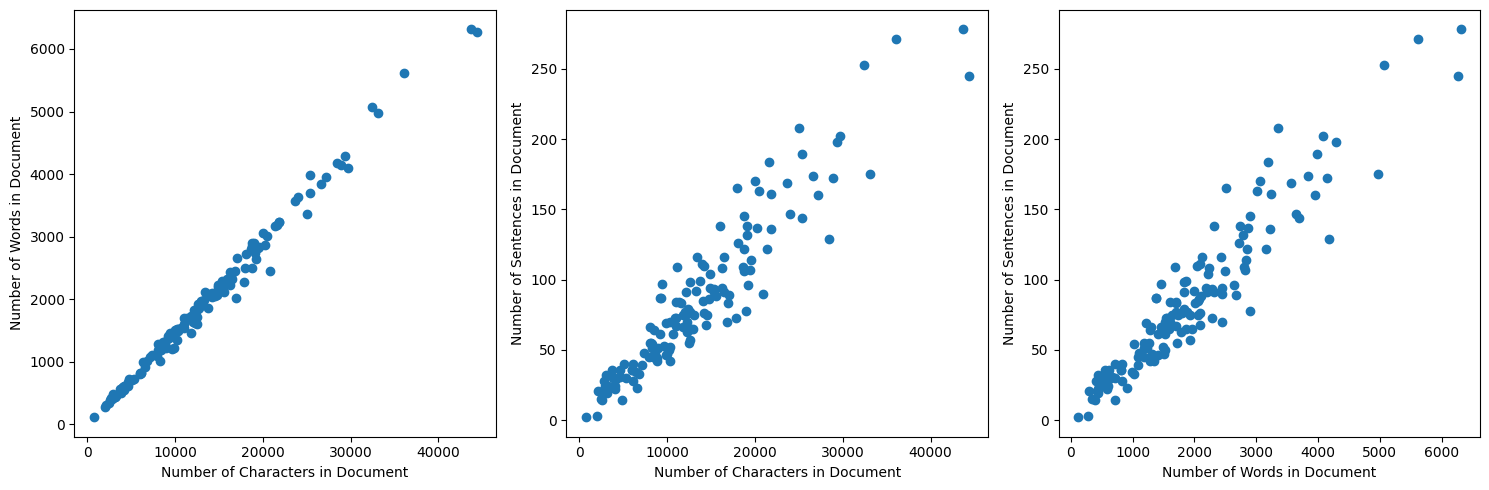

In [22]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].scatter(doc_len, words)
ax[0].set_xlabel('Number of Characters in Document')
ax[0].set_ylabel('Number of Words in Document')

ax[1].scatter(doc_len, num_sents)
ax[1].set_xlabel('Number of Characters in Document')
ax[1].set_ylabel('Number of Sentences in Document')

ax[2].scatter(words, num_sents)
ax[2].set_xlabel('Number of Words in Document')
ax[2].set_ylabel('Number of Sentences in Document')

plt.tight_layout()
plt.savefig(f'{my_git_root}/notebooks/images/len_words_sents.svg')

Find headings

In [23]:
import re

texts_split = []

for text in texts:
    texts_split.append(
        re.split(r'\s*\n+\s*', text)
    )

In [24]:
def flatten(lst):
    flat_list = []
    for sublist in lst:
        if isinstance(sublist, list):
            flat_list.extend(flatten(sublist))
        else:
            flat_list.append(sublist)
    return flat_list

In [25]:
texts_split_flat = flatten(texts_split)

In [26]:
len(texts_split_flat)

10408

In [27]:
texts_split_flat

['# Aalto University',
 '## Aalto University Research Data Management Policy',
 'The research data management policy aims to make data management easier for the individual researcher. Managing and curating data creates competitive edge, and allocating resources for that is a strategic choice of the university. The purposes of this policy are to (1) encourage to informed decision making in research data management and (2) define the principles used in the opening of publicly funded scientific research data to achieve wide societal impact and the strategic goals of Aalto University.',
 'The data management policy shall be implemented through conscious and strategic decisions. Open access publishing of research data aims to make research data easily discoverable, assessable, intelligible, usable and interoperable. Where applicable, these requirements can also be applied to data other than open access published research data, and to the software needed to handle the open data. The decision

['# Aalto University  \n\n## Aalto University Research Data Management Policy  \n\nThe research data management policy aims to make data management easier for the individual researcher. Managing and curating data creates competitive edge, and allocating resources for that is a strategic choice of the university. The purposes of this policy are to (1) encourage to informed decision making in research data management and (2) define the principles used in the opening of publicly funded scientific research data to achieve wide societal impact and the strategic goals of Aalto University.  \n\nThe data management policy shall be implemented through conscious and strategic decisions. Open access publishing of research data aims to make research data easily discoverable, assessable, intelligible, usable and interoperable. Where applicable, these requirements can also be applied to data other than open access published research data, and to the software needed to handle the open data. The decis

In [70]:
text_num_splits_heading = []

for text_split in texts_split:
    if len(text_split) != 1:
        for text in text_split:
            text_num_splits_heading.append(len(text))

In [71]:
len(text_num_splits_heading)

7349

In [72]:
np.sort(text_num_splits_heading)

array([   1,    1,    1, ..., 3389, 4086, 5464])

In [73]:
px.histogram(text_num_splits_heading, nbins=200)

In [74]:
np.quantile(text_num_splits_heading, 0.5)

np.float64(169.0)

In [75]:
text_len = [len(text) for text in texts_split_flat]

import plotly.express as px

px.histogram(text_len, nbins=30)

In [76]:
num_splits = [len(split) for split in texts_split]
px.histogram(num_splits, nbins=30)

In [77]:
np.quantile(num_splits, 0.5)

np.float64(47.0)

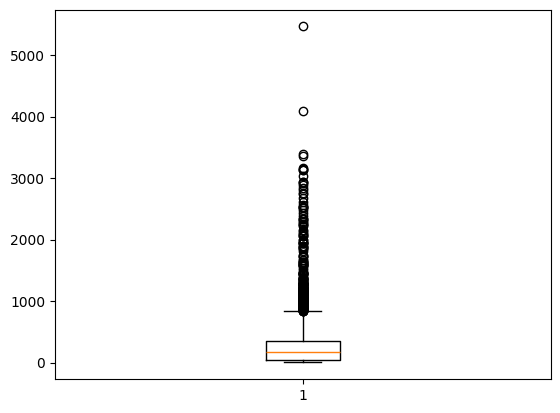

In [78]:
_ = plt.boxplot(text_num_splits_heading)

In [79]:
df_flat = pd.DataFrame(data={'text':texts_split_flat, 'doc_len': doc_len})

ValueError: All arrays must be of the same length

In [41]:
df_flat

,text,text_len
0,# Aalto University,18
1,## Aalto University Research Data Management P...,51
2,The research data management policy aims to ma...,506
3,The data management policy shall be implemente...,581
4,Ownership of copyright protected research data...,490
...,...,...
7344,This Policy should be read with reference to t...,55
7345,Wrexham University Policy and Procedure,39
7346,Data Protection and Data Disposal Policy\nInfo...,213
7347,### Legislation,15


In [80]:
df = pd.DataFrame({'name':df_extracted['name'], 'doc_len': doc_len, 'num_splits':num_splits})

In [56]:
len(text_len)

7349

In [81]:
df

,name,doc_len,num_splits
0,aalto-university.md,8234,29
1,aberystwyth-university.md,4664,8
2,aston-university.md,15528,78
3,bangor-university.md,33111,136
4,brunel-university-london.md,12631,20
...,...,...,...
137,universität-rostock.md,7372,25
138,universität-siegen.md,2014,5
139,universität-stuttgart.md,3144,12
140,utrecht-university.md,12625,53


In [85]:
fig = px.scatter(df, x='doc_len', y='num_splits', hover_name='name')
fig.update_layout(width=1000, height=1000)

In [92]:
mask = df_extracted['name'] == 'fachhochschule-joanneum.md'
my_text = df_extracted[mask].iloc[0]['text']

In [93]:
print(my_text)

# Information about data processing in the context of your studies  

Dear students!  

In the course of your studies, processing of your personal data is necessary. The following notice from FH JOANNNEUM Gesellschaft mbH, Alte Poststraße 149, 8020 Graz, as the data controller, is intended to provide you with all the necessary information pursuant to Art 13 GDPR that you need in order to ensure that your right to data protection is protected.  

In these matters, you can contact FH JOANNEUM Gesellschaft at datenschutz@fh-joanneum.at or its data protection officer at dsb@fh-joanneum.at  

## 1. Study Administration  

## Purpose of data processing  

The data processing serves the administration and handling of the processes related to your studies, such as the assignment to the respective study programme and semester, the administration of examinations and your achievements, up to graduation or withdrawal from the study programme. The data processing serves the documentation and organi

In [44]:
my_text = df_extracted.iloc[15]['text']

In [45]:


# display(Markdown(my_text))

In [46]:
delimiter_type = []

for i, row in df_extracted.iterrows():
    my_text = row['text']
    my_delimiter = ''

    my_text_split_headings = re.split(r'\n#+\s*', my_text)
    if len(my_text_split_headings) > 1:
        my_delimiter = 'heading'
        my_text_split_headings = re.split(r'\n#{2,4}\s*', my_text)
        if len(my_text_split_headings) > 1:
            my_delimiter = 'heading_hierarchical'
    else:
        my_delimiter = 'unknown'
    delimiter_type.append(my_delimiter)

In [47]:
df_extracted['delimiter_type'] = delimiter_type

In [48]:
df_extracted

,name,text,text_len,words,num_sents,delimiter_type
0,aalto-university.md,# Aalto University \n\n## Aalto University Re...,8234,1190,51,heading_hierarchical
1,aberystwyth-university.md,# Research Data Management Policy \n\nVersion...,4664,616,36,unknown
2,aston-university.md,# Research Data Management Policy \n\nJuly 20...,15528,2110,88,heading_hierarchical
3,bangor-university.md,# Data Protection Policy \n\n<html><body><tab...,33111,4970,175,heading_hierarchical
4,brunel-university-london.md,# Brunel University Research Data Management P...,12631,1835,98,heading_hierarchical
...,...,...,...,...,...,...
137,universität-rostock.md,# Research Data Policy of the University of Ro...,7372,1102,48,heading_hierarchical
138,universität-siegen.md,# Research-Data-Policy of the University of Si...,2014,279,3,unknown
139,universität-stuttgart.md,# Research data management policy of the Unive...,3144,443,22,heading_hierarchical
140,utrecht-university.md,# University policy framework for research dat...,12625,1872,77,heading_hierarchical


In [49]:
filter_unknown = df_extracted['delimiter_type'] == 'unknown'
filter_heading = df_extracted['delimiter_type'] == 'heading_hierarchical'

px.box(df_extracted[filter_unknown], x='text_len')

In [50]:
px.box(df_extracted[filter_heading], x='text_len')

In [51]:
df_extracted['delimiter_type'].value_counts() / len(df_extracted)

delimiter_type
heading_hierarchical    0.957746
unknown                 0.035211
heading                 0.007042
Name: count, dtype: float64

In [52]:
source = []